# Fine-Tuning DeepSeek R1: Step-by-Step Guide


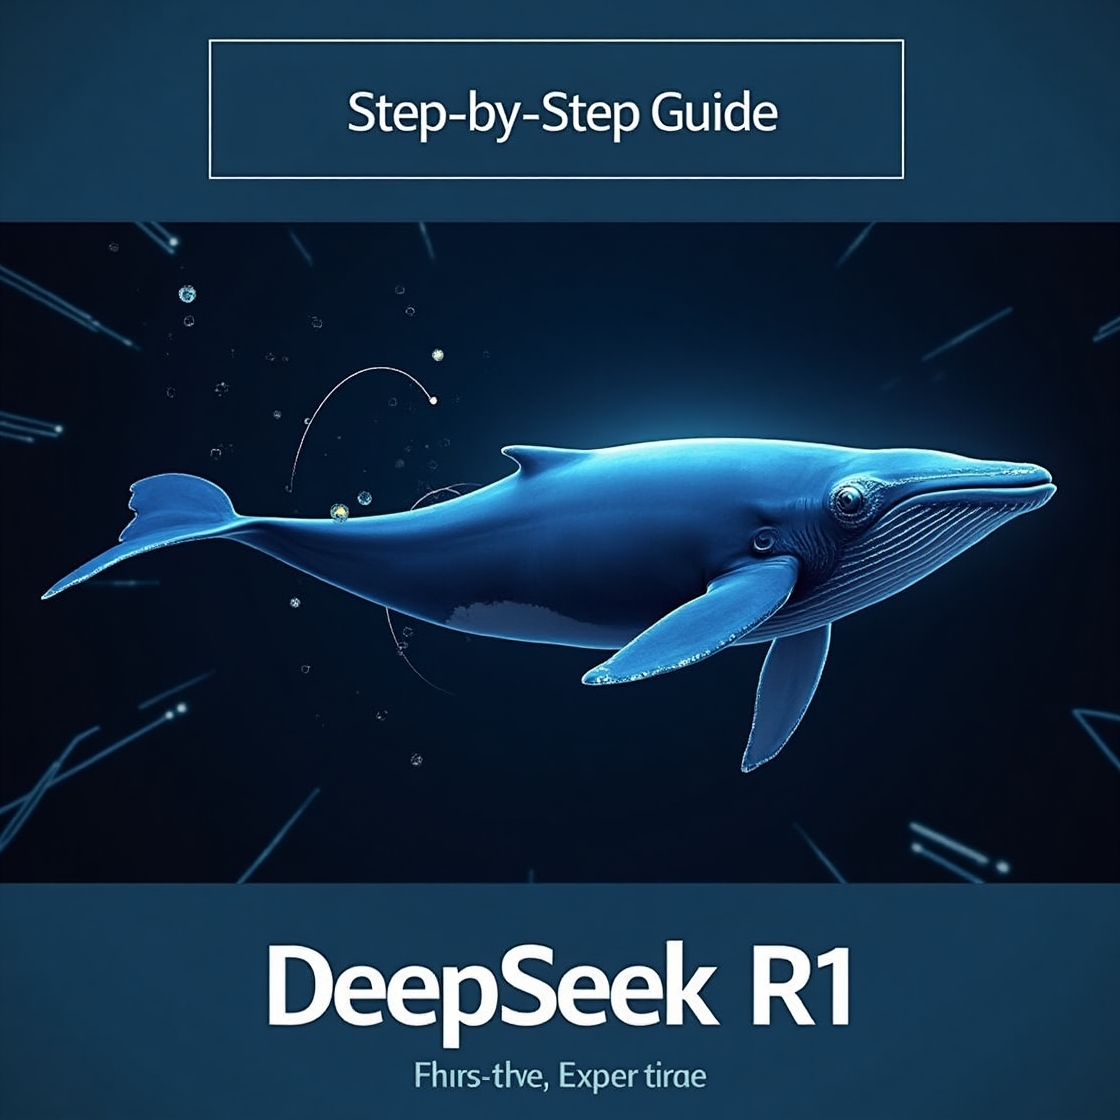![image.png]()

## Introducing DeepSeek R1
* Chinese AI company DeepSeek AI has open-sourced its first-generation reasoning models, DeepSeek-R1 and DeepSeek-R1-Zero, which rival OpenAI's o1 in performance on reasoning tasks like math, coding, and logic. You can read our full guide to DeepSeek R1 to learn more.

## DeepSeek-R1-Zero
* DeepSeek-R1-Zero is the first open-source model trained solely with large-scale reinforcement learning (RL) instead of supervised fine-tuning (SFT) as an initial step. This approach enables the model to independently explore chain-of-thought (CoT) reasoning, solve complex problems, and iteratively refine its outputs. However, it comes with challenges such as repetitive reasoning steps, poor readability, and language mixing that can impact its clarity and usability.

## DeepSeek-R1
* DeepSeek-R1 was introduced to overcome the limitations of DeepSeek-R1-Zero by incorporating cold-start data before reinforcement learning, providing a strong foundation for reasoning and non-reasoning tasks.

* This multi-stage training enables the model to achieve state-of-the-art performance, comparable to OpenAI-o1, across math, code, and reasoning benchmarks while improving its output's readability and coherence.



#### Software Installation
##### Ensure you have Python 3.8+ and install the necessary dependencies: 🏗️📥💡

In [1]:
!pip install unsloth torch transformers datasets accelerate bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.7/192.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## DeepSeek Distillation
> Along with large language models that require extensive computing power and memory to operate, DeepSeek has also introduced distilled models. These smaller, more efficient models have demonstrated that they can still achieve remarkable reasoning performance.

> Ranging from 1.5B to 70B parameters, these models retain strong reasoning capabilities, with DeepSeek-R1-Distill-Qwen-32B outperforming OpenAI-o1-mini across multiple benchmarks.

Smaller models inherit larger models' reasoning patterns, showcasing the distillation process's effectiveness.

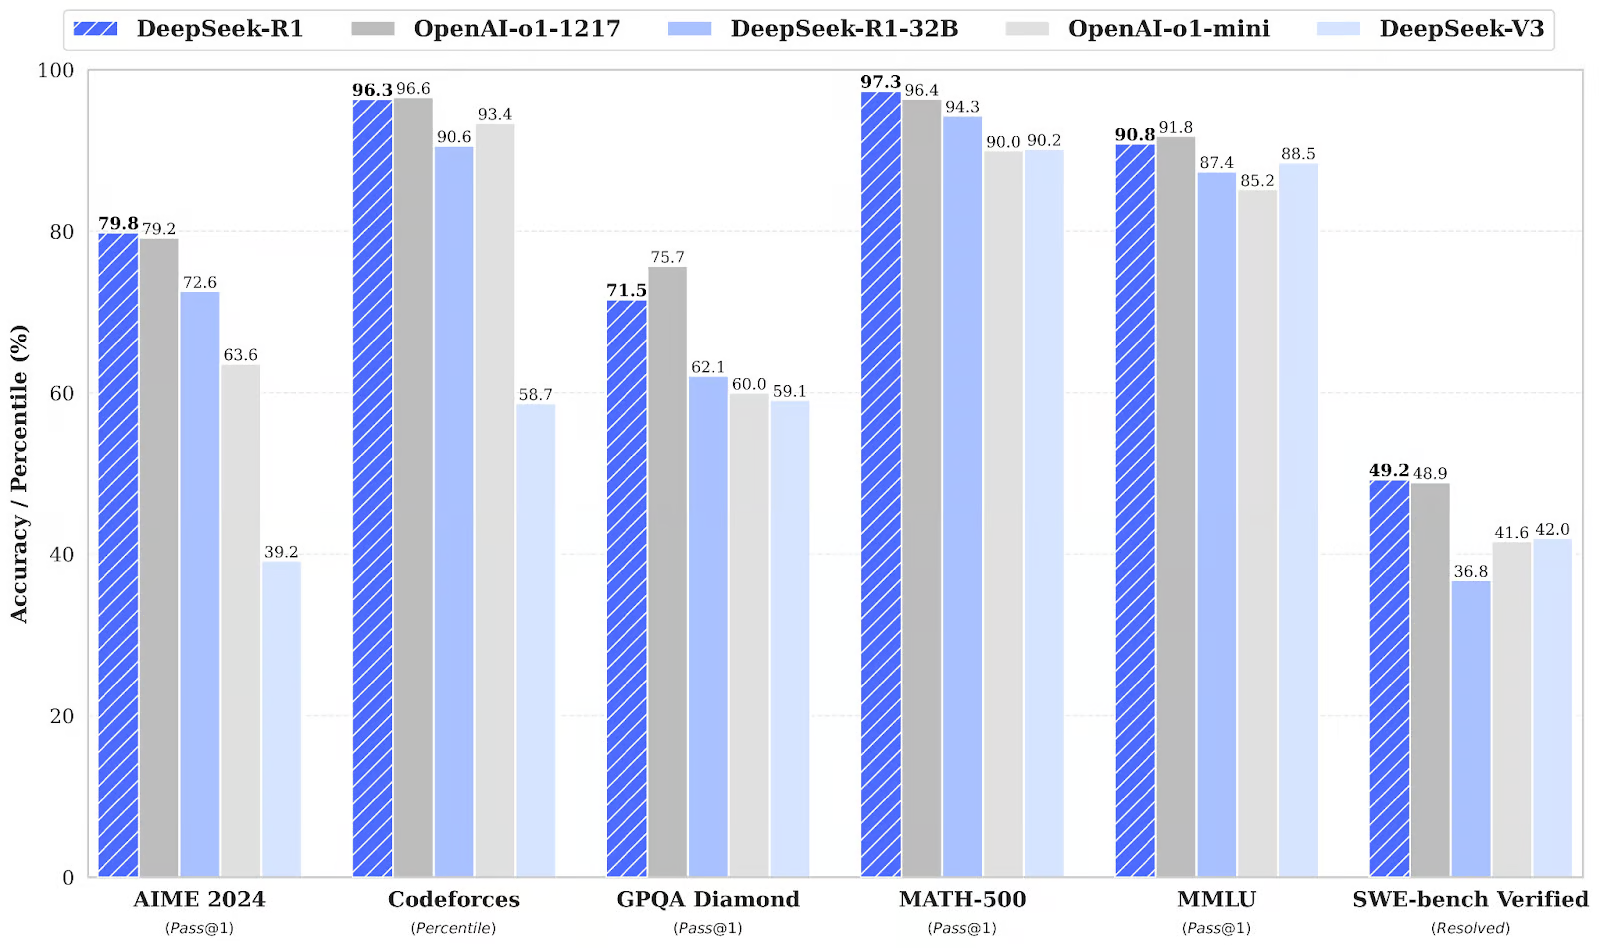

Read the DeepSeek-R1: Features, o1 Comparison, Distilled Models & More blog to learn about its key features, development process, distilled models, access, pricing, and comparison to OpenAI o1.

## Load the dataset using Hugging Face’s datasets library: 📚🔍💡



#### To fine-tune the DeepSeek R1 model, you can follow the steps below:

* 1. Setting up
For this project, we are using Kaggle as our Cloud IDE because it provides free access to GPUs, which are often more powerful than those available in Google Colab. To get started, launch a new Kaggle notebook and add your Hugging Face token and Weights & Biases token as secrets.

You can add secrets by navigating to the Add-ons tab in the Kaggle notebook interface and selecting the Secrets option.

After setting up the secrets, install the unsloth Python package. Unsloth is an open-source framework designed to make fine-tuning large language models (LLMs) 2X faster and more memory-efficient.

Read our Unsloth Guide: Optimize and Speed Up LLM Fine-Tuning to learn about Unsloth's key features, various functions, and how to optimize your fine-tuning workflow.

Log in to the Hugging Face CLI using the Hugging Face API that we securely extracted from Kaggle Secrets.




In [ ]:
import os
from huggingface_hub import login

# Set the token as an environment variable (only needed once)
t1="hf_igeAOLi"
t2="fcXJrnhOhV"
t3="JNNIFxAvoFI"
t4="ZEWCLi"
os.environ["HUGGINGFACE_TOKEN"] = concat(t1,t2,t3,t4)

# Login using the token
login(token=os.getenv("HUGGINGFACE_TOKEN"))

# Now you can use Hugging Face models, datasets, etc.
hf_token = os.getenv("HUGGINGFACE_TOKEN")


Log in to Weights & Biases (wandb) using your API key and create a new project to track the experiments and fine-tuning progress.




In [ ]:
import os
import wandb

# Set the API key (only needed once, recommended for security)
os.environ["WANDB_API_KEY"] = "001bee72dbe634c2365f19718f17c88d20027e90"

# Initialize wandb using the environment variable
wandb.login(key=os.getenv("WANDB_API_KEY"))

print("WandB login successful!")

wandb: Currently logged in as: rombiart (rombiart-datacouch). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


WandB login successful!


In [ ]:
run = wandb.init(
    project='Fine-tune-DeepSeek-R1-Distill-Llama-8B on Medical COT Dataset',
    job_type="training",
    anonymous="allow"
)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


# 2. Loading the model and tokenizer


For this project, we are loading the Unsloth version of DeepSeek-R1-Distill-Llama-8B.  Additionally, we will load the model in 4-bit quantization to optimize memory usage and performance.

In [ ]:
%%capture
!pip uninstall unsloth unsloth_zoo -y
!pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --upgrade --no-cache-dir "git+https://github.com/unslothai/unsloth-zoo.git"


In [ ]:
from unsloth import FastLanguageModel

#max_seq_length = 2048
dtype = None
load_in_4bit = True


from unsloth import FastLanguageModel

model_name = "unsloth/DeepSeek-R1-Distill-Llama-8B-unsloth-bnb-4bit"
max_seq_length = 2048
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name=model_name,
    max_seq_length=max_seq_length,
    load_in_4bit=True,
)

==((====))==  Unsloth 2025.1.6: Fast Llama patching. Transformers: 4.47.1.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


# 3. Model inference before fine-tuning


To create a prompt style for the model, we will define a system prompt and include placeholders for the question and response generation. The prompt will guide the model to think step-by-step and provide a logical, accurate response.

In [ ]:
prompt_style = """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Instruction:
You are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning.
Please answer the following medical question.

### Question:
{}

### Response:
<think>{}"""

In this example, we will provide a medical question to the prompt_style, convert it into tokens, and then pass the tokens to the model for response generation.




In [ ]:
question = "A 61-year-old woman with a long history of involuntary urine loss during activities like coughing or sneezing but no leakage at night undergoes a gynecological exam and Q-tip test. Based on these findings, what would cystometry most likely reveal about her residual volume and detrusor contractions?"


FastLanguageModel.for_inference(model)
inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

outputs = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=1200,
    use_cache=True,
)
response = tokenizer.batch_decode(outputs)
print(response[0].split("### Response:")[1])


<think>
Okay, so I'm trying to figure out what the cystometry would show for this 61-year-old woman. Let me break down the information given.

First, she has a long history of involuntary urine loss when she coughs or sneezes. That makes me think of stress urinary incontinence, which is usually due to the bladder not closing properly during these activities. But she doesn't leak at night, so it's probably not related to nocturia. 

She underwent a gynecological exam and Q-tip test. From what I remember, the Q-tip test is used to check for urethral obstruction. If the tip of the catheter (the Q-tip) doesn't straightens out easily, it suggests that the urethra is blocked, possibly due to a urethral stricture or something else like a tumor. But I'm not entirely sure how that ties into cystometry findings.

Now, thinking about cystometry, which is a test where they fill the bladder and measure how it holds urine. The two main things they look for are the residual volume and detrusor contr

> Even without fine-tuning, our model successfully generated a chain of thought and provided reasoning before delivering the final answer. The reasoning process is encapsulated within the <think></think> tags.

> So, why do we still need fine-tuning? The reasoning process, while detailed, was long-winded and not concise. Additionally, the final answer was presented in a bullet-point format, which deviates from the structure and style of the dataset that we want to fine-tune on.

```
<think>
Okay, so I have this medical question to answer. Let me try to break it down. The patient is a 61-year-old woman with a history of involuntary urine loss during activities like coughing or sneezing, but she doesn't leak at night. She's had a gynecological exam and a Q-tip test. I need to figure out what cystometry would show regarding her residual volume and detrusor contractions.

First, I should recall what I know about urinary incontinence. Involuntary urine loss during activities like coughing or sneezing makes me think of stress urinary incontinence. Stress incontinence typically happens when the urethral sphincter isn't strong enough to resist increased abdominal pressure from activities like coughing, laughing, or sneezing. This usually affects women, especially after childbirth when the pelvic muscles and ligaments are weakened.

The Q-tip test is a common diagnostic tool for stress urinary incontinence. The test involves inserting a Q-tip catheter, which is a small balloon catheter, into the urethra. The catheter is connected to a pressure gauge. The patient is asked to cough, and the pressure reading is taken. If the pressure is above normal (like above 100 mmHg), it suggests that the urethral sphincter isn't closing properly, which is a sign of stress incontinence.

So, based on the history and the Q-tip test, the diagnosis is likely stress urinary incontinence. Now, moving on to what cystometry would show. Cystometry, also known as a filling cystometry, is a diagnostic procedure where a catheter is inserted into the bladder, and the bladder is filled with a liquid to measure how much it can hold (residual volume) and how it responds to being filled (like during a cough or sneeze). This helps in assessing the capacity and compliance of the bladder.

In a patient with stress incontinence, the bladder's capacity might be normal, but the sphincter's function is impaired. So, during the cystometry, the residual volume might be within normal limits because the bladder isn't overfilled. However, when the patient is asked to cough or perform a Valsalva maneuver, the detrusor muscle (the smooth muscle layer of the bladder) might not contract effectively, leading to an increase in intra-abdominal pressure, which might cause leakage.

Wait, but detrusor contractions are usually associated with voiding. In stress incontinence, the issue isn't with the detrusor contractions but with the sphincter's inability to prevent leakage. So, during cystometry, the detrusor contractions would be normal because they are part of the normal voiding process. However, the problem is that the sphincter doesn't close properly, leading to leakage.

So, putting it all together, the residual volume might be normal, but the detrusor contractions would be normal as well. The key finding would be the impaired sphincter function leading to incontinence, which is typically demonstrated during the Q-tip test and clinical history. Therefore, the cystometry would likely show normal residual volume and normal detrusor contractions, but the underlying issue is the sphincter's inability to prevent leakage.
</think>

Based on the provided information, the cystometry findings in this 61-year-old woman with stress urinary incontinence would likely demonstrate the following:

1. **Residual Volume**: The residual volume would be within normal limits. This is because the bladder's capacity is typically normal in cases of stress incontinence, where the primary issue lies with the sphincter function rather than the bladder's capacity.

2. **Detrusor Contractions**: The detrusor contractions would also be normal. These contractions are part of the normal voiding process and are not impaired in stress urinary incontinence. The issue is not with the detrusor muscle but with the sphincter's inability to prevent leakage.

In summary, the key findings of the cystometry would be normal residual volume and normal detrusor contractions, highlighting the sphincteric defect as the underlying cause of the incontinence.<｜end▁of▁sentence｜>
```

# 4. Loading and processing the dataset


In [ ]:
train_prompt_style = """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Instruction:
You are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning.
Please answer the following medical question.

### Question:
{}

### Response:
<think>
{}
</think>
{}"""

In [ ]:
EOS_TOKEN = tokenizer.eos_token  # Must add EOS_TOKEN


def formatting_prompts_func(examples):
    inputs = examples["Question"]
    cots = examples["Complex_CoT"]
    outputs = examples["Response"]
    texts = []
    for input, cot, output in zip(inputs, cots, outputs):
        text = train_prompt_style.format(input, cot, output) + EOS_TOKEN
        texts.append(text)
    return {
        "text": texts,
    }

In [ ]:
from datasets import load_dataset
dataset = load_dataset("FreedomIntelligence/medical-o1-reasoning-SFT","en", split = "train[0:500]",trust_remote_code=True)
dataset = dataset.map(formatting_prompts_func, batched = True,)
dataset["text"][0]

README.md:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

medical_o1_sft.json:   0%|          | 0.00/74.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25371 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

"Below is an instruction that describes a task, paired with an input that provides further context. \nWrite a response that appropriately completes the request. \nBefore answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.\n\n### Instruction:\nYou are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning. \nPlease answer the following medical question. \n\n### Question:\nA 61-year-old woman with a long history of involuntary urine loss during activities like coughing or sneezing but no leakage at night undergoes a gynecological exam and Q-tip test. Based on these findings, what would cystometry most likely reveal about her residual volume and detrusor contractions?\n\n### Response:\n<think>\nOkay, let's think about this step by step. There's a 61-year-old woman here who's been dealing with involuntary urine leakages whenever she's doing something that ups her ab

In [ ]:
"Below is an instruction that describes a task, paired with an input that provides further context. \nWrite a response that appropriately completes the request. \nBefore answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.\n\n### Instruction:\nYou are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning. \nPlease answer the following medical question. \n\n### Question:\nA 61-year-old woman with a long history of involuntary urine loss during activities like coughing or sneezing but no leakage at night undergoes a gynecological exam and Q-tip test. Based on these findings, what would cystometry most likely reveal about her residual volume and detrusor contractions?\n\n### Response:\n<think>\nOkay, let's think about this step by step. There's a 61-year-old woman here who's been dealing with involuntary urine leakages whenever she's doing something that ups her abdominal pressure like coughing or sneezing. This sounds a lot like stress urinary incontinence to me. Now, it's interesting that she doesn't have any issues at night; she isn't experiencing leakage while sleeping. This likely means her bladder's ability to hold urine is fine when she isn't under physical stress. Hmm, that's a clue that we're dealing with something related to pressure rather than a bladder muscle problem. \n\nThe fact that she underwent a Q-tip test is intriguing too. This test is usually done to assess urethral mobility. In stress incontinence, a Q-tip might move significantly, showing urethral hypermobility. This kind of movement often means there's a weakness in the support structures that should help keep the urethra closed during increases in abdominal pressure. So, that's aligning well with stress incontinence.\n\nNow, let's think about what would happen during cystometry. Since stress incontinence isn't usually about sudden bladder contractions, I wouldn't expect to see involuntary detrusor contractions during this test. Her bladder isn't spasming or anything; it's more about the support structure failing under stress. Plus, she likely empties her bladder completely because stress incontinence doesn't typically involve incomplete emptying. So, her residual volume should be pretty normal. \n\nAll in all, it seems like if they do a cystometry on her, it will likely show a normal residual volume and no involuntary contractions. Yup, I think that makes sense given her symptoms and the typical presentations of stress urinary incontinence.\n</think>\nCystometry in this case of stress urinary incontinence would most likely reveal a normal post-void residual volume, as stress incontinence typically does not involve issues with bladder emptying. Additionally, since stress urinary incontinence is primarily related to physical exertion and not an overactive bladder, you would not expect to see any involuntary detrusor contractions during the test.<｜end▁of▁sentence｜>"

"Below is an instruction that describes a task, paired with an input that provides further context. \nWrite a response that appropriately completes the request. \nBefore answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.\n\n### Instruction:\nYou are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning. \nPlease answer the following medical question. \n\n### Question:\nA 61-year-old woman with a long history of involuntary urine loss during activities like coughing or sneezing but no leakage at night undergoes a gynecological exam and Q-tip test. Based on these findings, what would cystometry most likely reveal about her residual volume and detrusor contractions?\n\n### Response:\n<think>\nOkay, let's think about this step by step. There's a 61-year-old woman here who's been dealing with involuntary urine leakages whenever she's doing something that ups her ab

# 5. Setting up the model


Using the target modules, we will set up the model by adding the low-rank adopter to the model.




In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
    ],
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    use_gradient_checkpointing="unsloth",  # True or "unsloth" for very long context
    random_state=3407,
    use_rslora=False,
    loftq_config=None,
)

Unsloth 2025.1.6 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


Next, we will set up the training arguments and the trainer by providing the model, tokenizers, dataset, and other important training parameters that will optimize our fine-tuning process.




In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    dataset_num_proc=2,
    args=TrainingArguments(
        per_device_train_batch_size=2,
        gradient_accumulation_steps=4,
        # Use num_train_epochs = 1, warmup_ratio for full training runs!
        warmup_steps=5,
        max_steps=60,
        learning_rate=2e-4,
        fp16=not is_bfloat16_supported(),
        bf16=is_bfloat16_supported(),
        logging_steps=10,
        optim="adamw_8bit",
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed=3407,
        output_dir="outputs",
    ),
)

Map (num_proc=2):   0%|          | 0/500 [00:00<?, ? examples/s]

# 6. Model training


Run the following command to start training.  




In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 500 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 60
 "-____-"     Number of trainable parameters = 41,943,040
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


The training process would take approx 44 minutes to finish. The training loss has gradually reduced, which is a good sign of better model performance.



The training process took 44 minutes to finish. The training loss has gradually reduced, which is a good sign of better model performance.

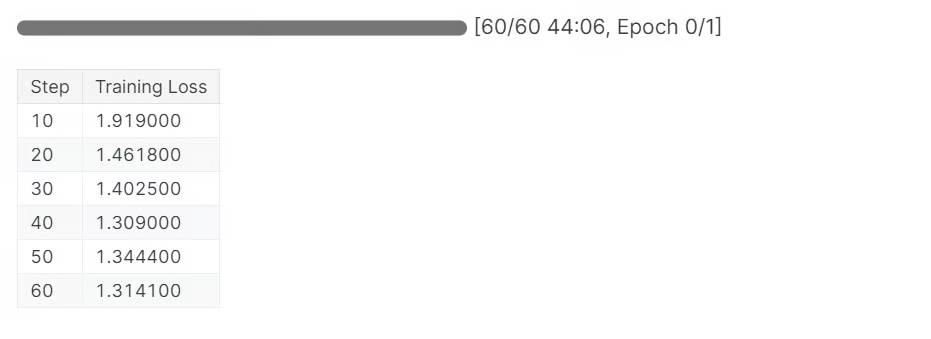

You can view the fill model evaluation report on the Weights and bais dash board by loging into theo the website and viewin the project.



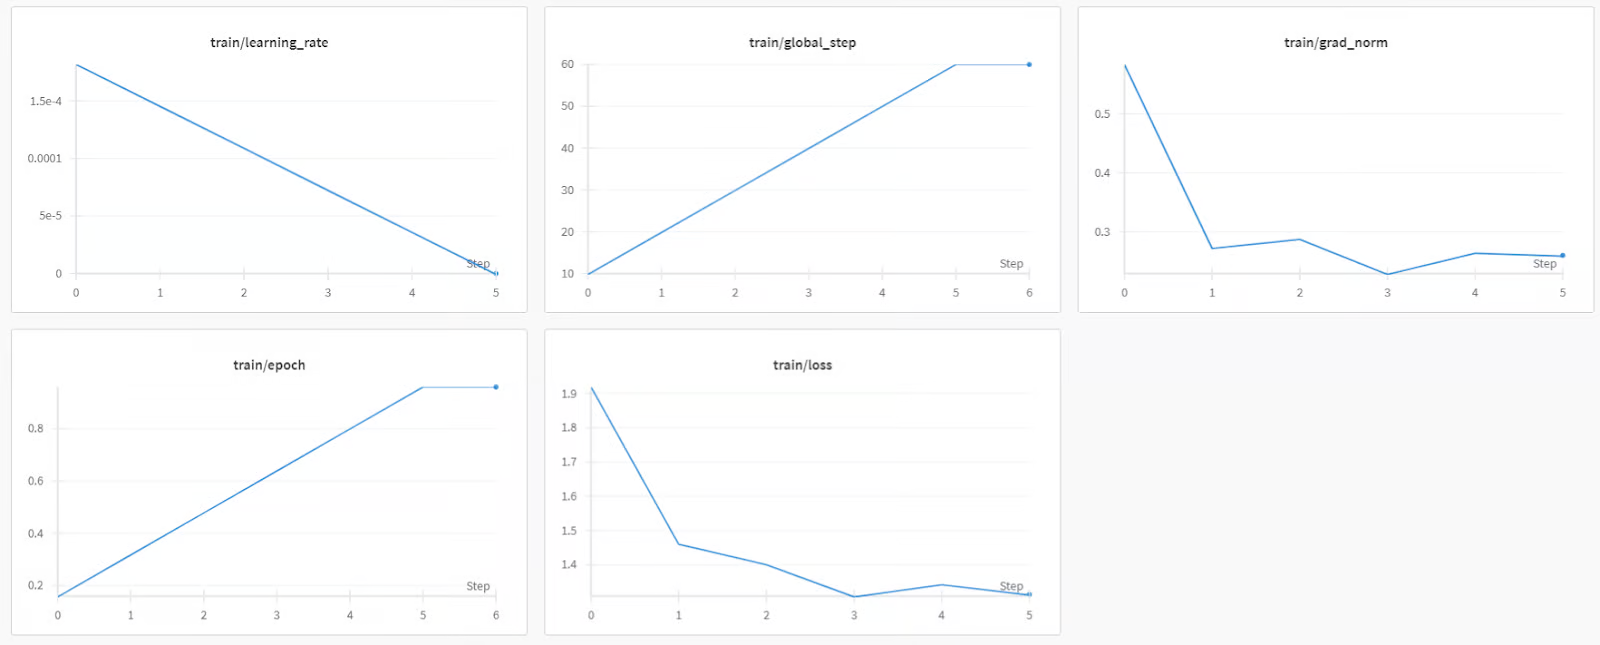

# 7. Model inference after fine-tuning


In [ ]:
question = "A 61-year-old woman with a long history of involuntary urine loss during activities like coughing or sneezing but no leakage at night undergoes a gynecological exam and Q-tip test. Based on these findings, what would cystometry most likely reveal about her residual volume and detrusor contractions?"


FastLanguageModel.for_inference(model)  # Unsloth has 2x faster inference!
inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

outputs = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=1200,
    use_cache=True,
)
response = tokenizer.batch_decode(outputs)
print(response[0].split("### Response:")[1])



<think>
Okay, so let's think about this. We have a 61-year-old woman who's been dealing with involuntary urine loss during things like coughing or sneezing, but she's not leaking at night. That suggests she might have some kind of problem with her pelvic floor muscles or maybe her bladder.

Now, she's got a gynecological exam and a Q-tip test. Let's break that down. The Q-tip test is usually used to check for urethral obstruction. If it's positive, that means there's something blocking the urethra, like a urethral stricture or something else.

Given that she's had a positive Q-tip test, it's likely there's a urethral obstruction. That would mean her urethra is narrow, maybe due to a stricture or some kind of narrowing. So, her bladder can't empty properly during activities like coughing because the urethral obstruction is making it hard.

Now, let's think about what happens when her bladder can't empty. If there's a urethral obstruction, the bladder is forced to hold more urine, incre

This is much better and more accurate. The chain of thought was direct, and the answer was straightforward and in one paragraph. The fine-tuning was successful.





## Optional as the below part would little longer

# 8. Saving the model locally


Now, let's save the adopter, full model, and tokenizer locally so that we can use them in other projects.




In [ ]:
new_model_local = "DeepSeek-R1-Medical-COT"
model.save_pretrained(new_model_local)
tokenizer.save_pretrained(new_model_local)

model.save_pretrained_merged(new_model_local, tokenizer, save_method = "merged_16bit",)

Unsloth: You have 1 CPUs. Using `safe_serialization` is 10x slower.
We shall switch to Pytorch saving, which might take 3 minutes and not 30 minutes.
To force `safe_serialization`, set it to `None` instead.
Unsloth: Kaggle/Colab has limited disk space. We need to delete the downloaded
model which will save 4-16GB of disk space, allowing you to save on Kaggle/Colab.
Unsloth: Will remove a cached repo with size 6.0G


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 3.87 out of 12.67 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


 34%|███▍      | 11/32 [00:00<00:01, 13.36it/s]
We will save to Disk and not RAM now.
100%|██████████| 32/32 [04:05<00:00,  7.68s/it]


Unsloth: Saving tokenizer... Done.
Unsloth: Saving DeepSeek-R1-Medical-COT/pytorch_model-00001-of-00004.bin...
Unsloth: Saving DeepSeek-R1-Medical-COT/pytorch_model-00002-of-00004.bin...
Unsloth: Saving DeepSeek-R1-Medical-COT/pytorch_model-00003-of-00004.bin...
Unsloth: Saving DeepSeek-R1-Medical-COT/pytorch_model-00004-of-00004.bin...
Done.


# 9. Pushing the model to Hugging Face Hub


We will also push the adopter, tokenizer, and model to Hugging Face Hub so that the AI community can take advantage of this model by integrating it into their systems.





In [ ]:
new_model_online = "indrajit/DeepSeek-R1-Medical-COT"
model.push_to_hub(new_model_online)
tokenizer.push_to_hub(new_model_online)

model.push_to_hub_merged(new_model_online, tokenizer, save_method = "merged_16bit")

The next step in your learning journey is to serve and deploy your model to the cloud. You can follow the How to Deploy LLMs with BentoML guide, which provides a step-by-step process for deploying large language models efficiently and cost-effectively using BentoML and tools like vLLM.

Alternatively, if you prefer to use the model locally, you can convert it into GGUF format and run it on your machine. For this, check out the Fine-tuning Llama 3.2 and Using It Locally guide, which provides detailed instructions for local usage

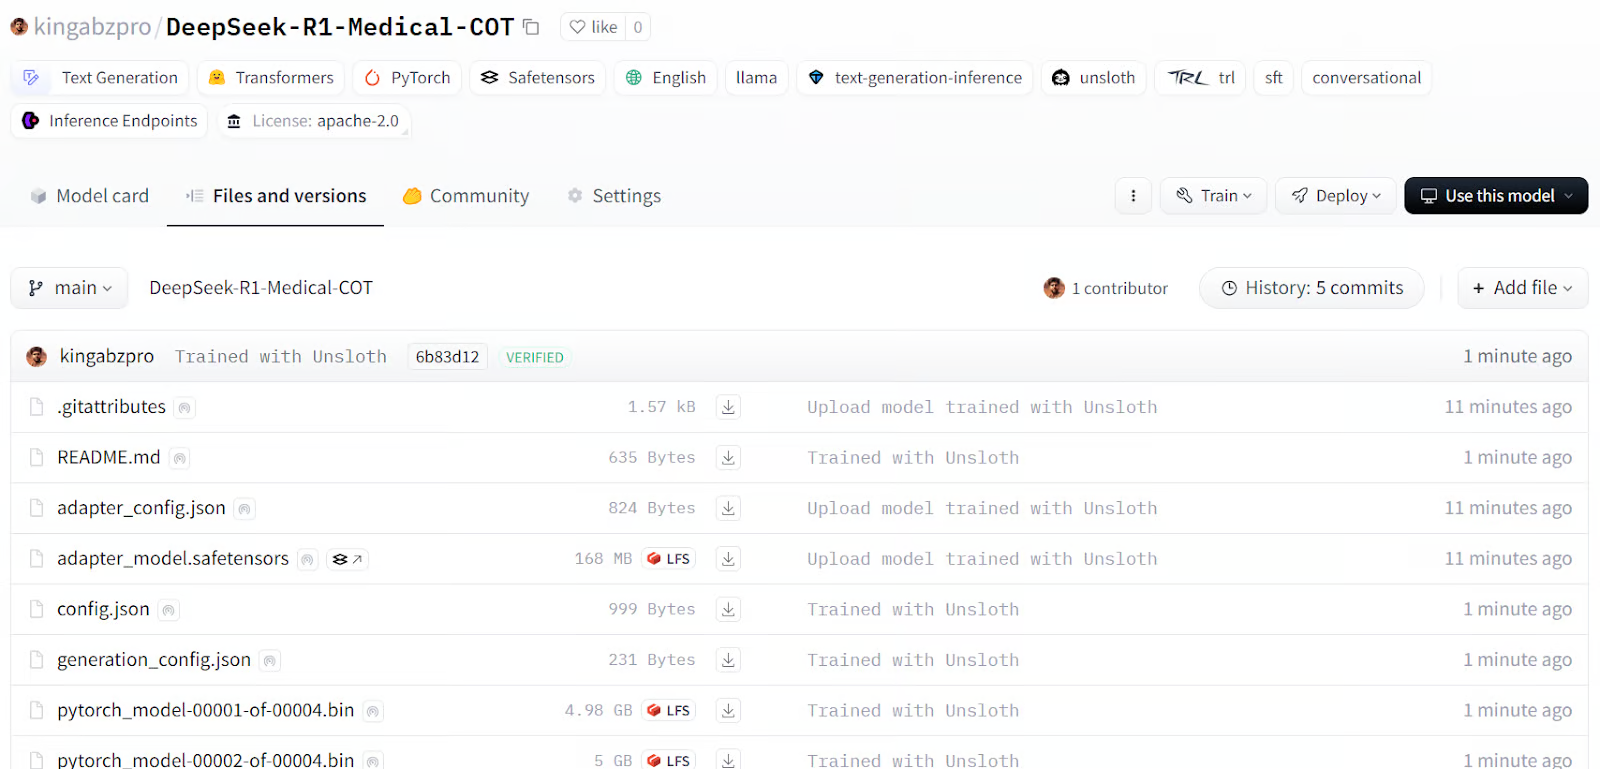

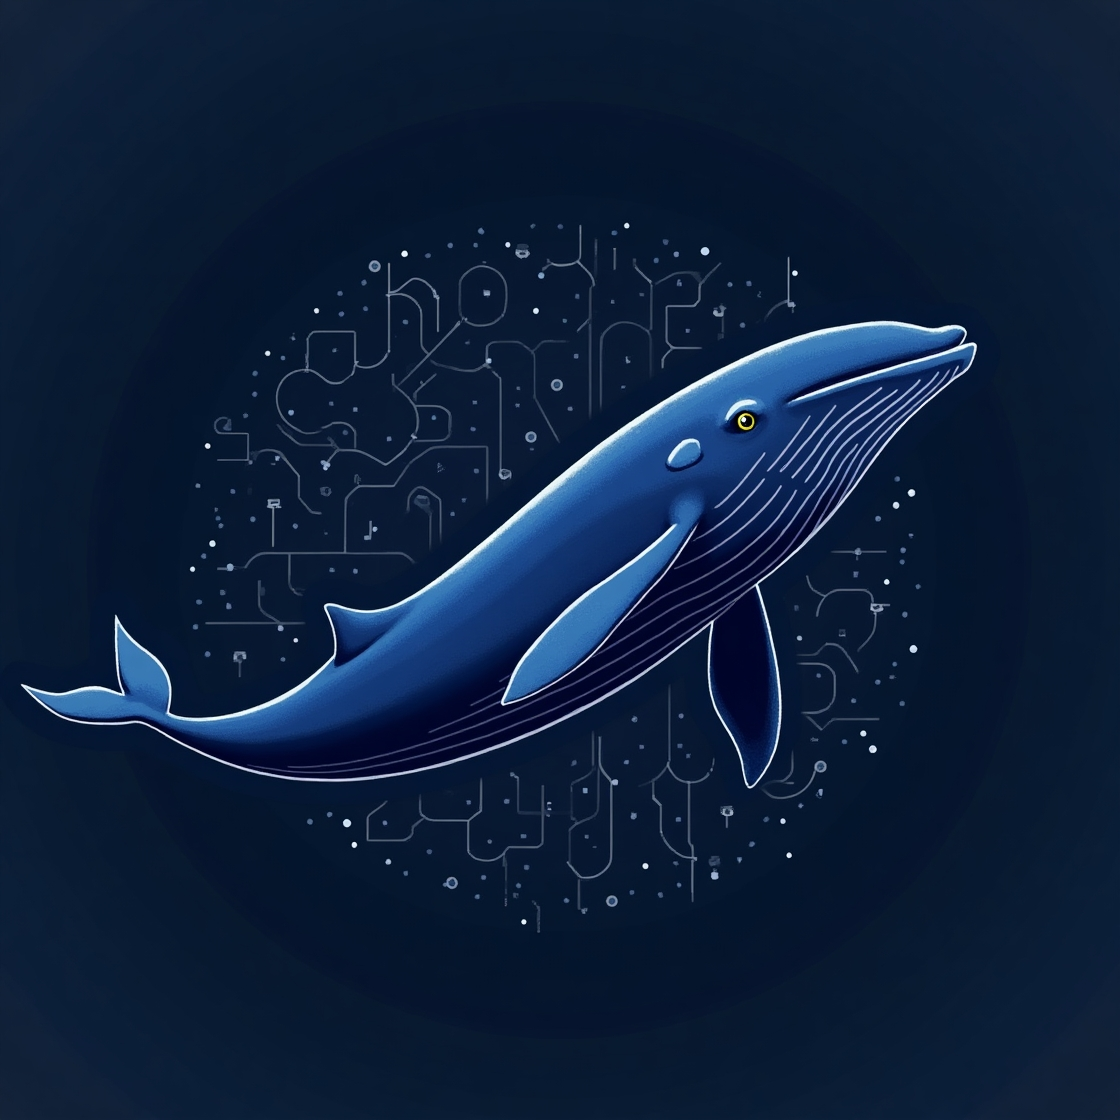